In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [2]:
data = pd.read_csv("Churn_Modelling.csv")
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
for col in data.columns:
    print("col name: ", col, '- Unique percentage: ', len(data[col].unique()) / len(data))

col name:  RowNumber - Unique percentage:  1.0
col name:  CustomerId - Unique percentage:  1.0
col name:  Surname - Unique percentage:  0.2932
col name:  CreditScore - Unique percentage:  0.046
col name:  Geography - Unique percentage:  0.0003
col name:  Gender - Unique percentage:  0.0002
col name:  Age - Unique percentage:  0.007
col name:  Tenure - Unique percentage:  0.0011
col name:  Balance - Unique percentage:  0.6382
col name:  NumOfProducts - Unique percentage:  0.0004
col name:  HasCrCard - Unique percentage:  0.0002
col name:  IsActiveMember - Unique percentage:  0.0002
col name:  EstimatedSalary - Unique percentage:  0.9999
col name:  Exited - Unique percentage:  0.0002


In [5]:
data.drop(['CustomerId','RowNumber','Surname'],axis=1,inplace=True)
data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [6]:
OE = OneHotEncoder()
encodings = OE.fit_transform(data['Geography'].values.reshape(-1, 1)).toarray()
values = data['Geography'].unique()

for i, val in enumerate(values):
    data['Geography_' + str(val)] = encodings[:, i]
data = data.drop('Geography', axis=1)

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data.head(2)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Spain,Geography_Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0


In [7]:
X = data.drop('Exited',axis=1).values
Y = data['Exited'].values.astype(np.uint8)

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2,random_state=42)

In [9]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(8000, 12)
(8000,)
(2000, 12)
(2000,)


In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

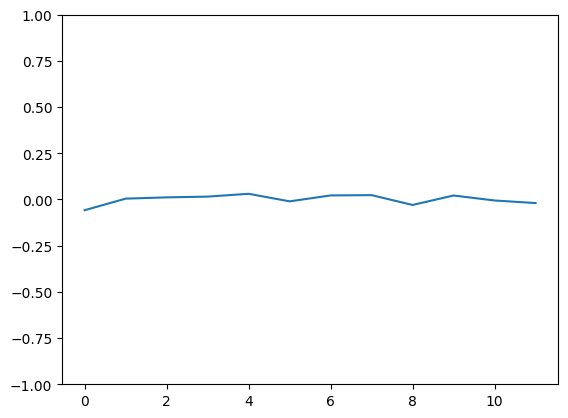

In [11]:
plt.ylim(-1,1)
means = []
for i in range(X.shape[1]):
    means.append(np.mean(X_test[:,i]))
plt.plot(means,scaley=False)

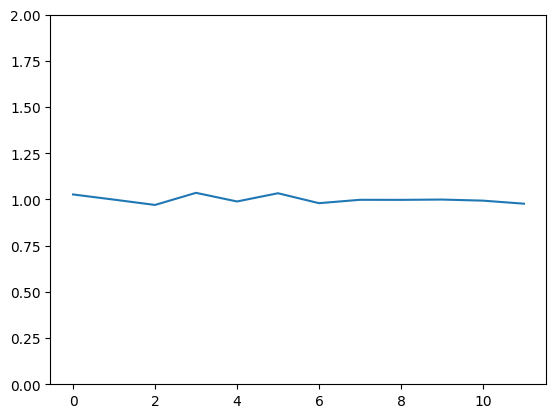

In [12]:
plt.ylim(0,2)
vars = []
for i in range(X.shape[1]):
    vars.append(np.var(X_test[:,i]))
plt.plot(vars)

In [13]:
model = LogisticRegression()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.811

In [14]:
print(model.coef_,model.intercept_)

[[-0.06768375 -0.26474696  0.75425162 -0.04268434  0.16070587 -0.06063947
  -0.01026946 -0.53333477  0.01574582 -0.13083258  0.22431992 -0.07371892]] [-1.63568342]


In [15]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [16]:
print(sigmoid(model.coef_.dot(X_test[10,:]) + model.intercept_) )
print(np.round(sigmoid(model.coef_.dot(X_test[10,:]) + model.intercept_)) )

[0.25681179]
[0.]


In [17]:
model.predict(X_test[10,:].reshape(1,-1))

array([0], dtype=uint8)

In [18]:
model = LogisticRegression()
rfecv = RFECV(model,step=1,min_features_to_select=6,n_jobs=-1)
rfecv.fit(X_train,Y_train)

RFECV(estimator=LogisticRegression(), min_features_to_select=6, n_jobs=-1)

In [19]:
print(rfecv.support_)
print(rfecv.ranking_)

[False  True  True False  True False False  True False  True  True  True]
[2 1 1 4 1 3 6 1 5 1 1 1]


In [20]:
selected_ft = np.where(rfecv.support_)[0]
X_train = X_train[:,selected_ft]
X_test = X_test[:,selected_ft]
X = X[:,selected_ft]

In [21]:
kfold = KFold(n_splits=5)
test_scores = []
for trainIdx,testIdx in kfold.split(X_train):
    x_train = X[trainIdx]
    y_train = Y[trainIdx]
    
    Xtest = X[testIdx]
    Ytest = Y[testIdx]
    
    model = LogisticRegression()
    model.fit(x_train,y_train)
    test_scores.append(model.score(Xtest,Ytest))
    
    

In [22]:
test_scores

[0.78875, 0.78875, 0.7925, 0.799375, 0.80125]

In [23]:
model.fit(X_train,Y_train)

LogisticRegression()

In [24]:
model.score(X_test,Y_test)

0.8125

In [25]:
params_grid = {"penalty":['l2'],
               'C':[1.0,2.0,3.0],
               'max_iter':[100,200,300,500],
               'solver':['newton-cg', 'lbfgs', 'sag', 'saga']
               }

model = LogisticRegression()
grid_search = GridSearchCV(model,params_grid)
grid_search.fit(X_train,Y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0, 3.0], 'max_iter': [100, 200, 300, 500],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [26]:
grid_search.best_params_

{'C': 2.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [27]:
grid_search.score(X_test,Y_test)

0.8125